In [1]:
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers
from keras.callbacks import History
history = History()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Data Acquisition

In [2]:
# Data Acuisition
x_train=pd.read_csv("mnist_train.csv")
x_test=pd.read_csv("mnist_test.csv")

In [3]:
# Data Visulization
x_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Data Preprocessing

y_train = x_train.iloc[:,1].values
x_train = x_train.drop(["label"],axis=1)
y_test = x_test.iloc[:,1].values
x_test = x_test.drop(["label"],axis=1)

In [5]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [6]:
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size = 0.2, random_state = 0)

In [7]:
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')
print(f'x_val shape = {x_val.shape}')

x_train shape = (48000, 784)
x_test shape = (10000, 784)
x_val shape = (12000, 784)


# Model

In [8]:
encoding_dim = 32
input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(32, activation='relu', activity_regularizer=regularizers.l1(1e-6))(encoded)
decoded = Dense(128,activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

In [9]:
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 784)               101136    
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


# Fit Data

In [10]:
history = autoencoder.fit(x_train, x_train, epochs=300, batch_size = 256, shuffle = True,
              validation_data = (x_val,x_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/300
48000/48000 [==============================] - 3s 68us/step - loss: 0.3529 - val_loss: 0.2778
Epoch 2/300
48000/48000 [==============================] - 3s 62us/step - loss: 0.2705 - val_loss: 0.2625
Epoch 3/300
48000/48000 [==============================] - 3s 67us/step - loss: 0.2539 - val_loss: 0.2455
Epoch 4/300
48000/48000 [==============================] - 3s 61us/step - loss: 0.2355 - val_loss: 0.2256
Epoch 5/300
48000/48000 [==============================] - 3s 57us/step - loss: 0.2186 - val_loss: 0.2125
Epoch 6/300
48000/48000 [==============================] - 3s 61us/step - loss: 0.2077 - val_loss: 0.2033
Epoch 7/300
48000/48000 [==============================] - 3s 62us/step - loss: 0.1991 - val_loss: 0.1952
Epoch 8/300
48000/48000 [==============================] - 3s 53us/step - loss: 0.1921 - val_loss: 0.1894
Epoch 9/300
48000/48000 [==============================] - 3s 64us/step - loss: 0.1874 - val_loss: 0.1

Epoch 153/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1207 - val_loss: 0.1216
Epoch 154/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1207 - val_loss: 0.1209
Epoch 155/300
48000/48000 [==============================] - 2s 52us/step - loss: 0.1205 - val_loss: 0.1217
Epoch 156/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1204 - val_loss: 0.1213
Epoch 157/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1203 - val_loss: 0.1208
Epoch 158/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1203 - val_loss: 0.1207
Epoch 159/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1201 - val_loss: 0.1207
Epoch 160/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1200 - val_loss: 0.1208
Epoch 161/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1199 - val_loss: 0.1209
Epoch 162/300
48000/48000 [=

Epoch 229/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1155 - val_loss: 0.1162
Epoch 230/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1154 - val_loss: 0.1162
Epoch 231/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1155 - val_loss: 0.1159
Epoch 232/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1152 - val_loss: 0.1157
Epoch 233/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1153 - val_loss: 0.1157
Epoch 234/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1154 - val_loss: 0.1157
Epoch 235/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1151 - val_loss: 0.1158
Epoch 236/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1152 - val_loss: 0.1158
Epoch 237/300
48000/48000 [==============================] - 2s 51us/step - loss: 0.1152 - val_loss: 0.1158
Epoch 238/300
48000/48000 [=

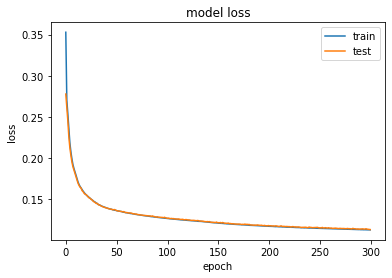

In [11]:
# Plot training loss and validation split loss over the epochs

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('sparseae_model_loss.png')
plt.show()

In [12]:
reconstructed_imgs = autoencoder.predict(x_test)
encoded_imgs = encoder.predict(x_test)

In [13]:
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation)

10000/10000 [==============================] - 0s 40us/step
Loss: 0.1066216037273407


In [14]:
#checkingthe encode images mean
encoded_imgs.mean()

0.66156393

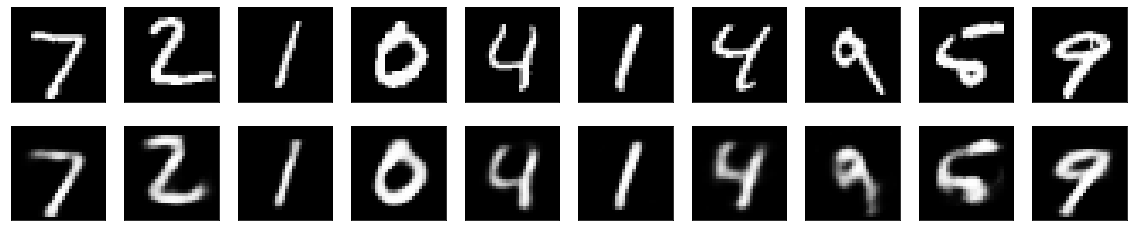

In [15]:
# Ploting the original input vs reconstructed output
n = 10
plt.figure(figsize =(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n, i+1+n)
    plt.imshow(reconstructed_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('sparseae_output.png')
plt.show()